In [52]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

In [140]:
def read_data(fname):
    data = pd.read_csv(fname, sep=';', header=None)
    ids = data[0].str.split(':', expand=True)[1]
    injections = ids.nunique()
    tmp = data[7].str.split(',', expand = True)
    init = pd.to_numeric(tmp[0].str.split(': ', expand=True)[1]).sum()/injections
    diag = pd.to_numeric(tmp[1].str.split(': ', expand=True)[1]).sum()/injections
    bkey = pd.to_numeric(tmp[2].str.split(': ', expand=True)[1]).sum()/injections
    prep = pd.to_numeric(data[8].str.split(': ', expand=True)[1]).sum()/injections
    gloc = pd.to_numeric(data[9].str.split(': ', expand=True)[1]).sum()/injections
    exec = pd.to_numeric(data[10].str.split(': ', expand=True)[1]).sum()/injections
    
    return(ids.size/injections, init+gloc, init+diag+gloc, init+diag+prep+gloc+ exec)

def clean_data(fname):
    data = pd.read_csv(fname, sep=';', header=None)
    ids = data[0].str.split(':', expand=True)[1]
    injections = ids.nunique()
    tmp = data[7].str.split(',', expand = True)
    init = pd.to_numeric(tmp[0].str.split(': ', expand=True)[1])
    diag = pd.to_numeric(tmp[1].str.split(': ', expand=True)[1])
    bkey = pd.to_numeric(tmp[2].str.split(': ', expand=True)[1])
    prep = pd.to_numeric(data[8].str.split(': ', expand=True)[1])
    gloc = pd.to_numeric(data[9].str.split(': ', expand=True)[1])
    exec = pd.to_numeric(data[10].str.split(': ', expand=True)[1])
    print (ids)
    print (init+diag+bkey+prep+gloc+exec)
    
    

In [141]:
#GTCP
O0 = '/home/cchen/Documents/Projects/CARE/Benchmarks/GTCP/O0/Timing/worker_0_record.care'
O1 = '/home/cchen/Documents/Projects/CARE/Benchmarks/GTCP/O1/Timing/worker_0_record.care'
gtcp_t0 = read_data(O0)
gtcp_t1 = read_data(O1)

In [142]:
#HPCCG
O0 = '/home/cchen/Documents/Projects/CARE/Benchmarks/hpccg/O0/Timing/worker_0_record.care'
O1 = '/home/cchen/Documents/Projects/CARE/Benchmarks/hpccg/O1/Timing/worker_0_record.care'
hpccg_t0 = read_data(O0)
hpccg_t1 = read_data(O1)

In [143]:
#miniMD
O0 = '/home/cchen/Documents/Projects/CARE/Benchmarks/miniMD/O0/Timing/worker_0_record.care'
O1 = '/home/cchen/Documents/Projects/CARE/Benchmarks/miniMD/O1/Timing/worker_0_record.care'
minimd_t0 = read_data(O0)
minimd_t1 = read_data(O1)

In [144]:
#CoMD
O0 = '/home/cchen/Documents/Projects/CARE/Benchmarks/CoMD/O0/Timing/worker_0_record.care'
O1 = '/home/cchen/Documents/Projects/CARE/Benchmarks/CoMD/O1/Timing/worker_0_record.care'
comd_t0 = read_data(O0)
comd_t1 = read_data(O1)

In [145]:
data = pd.DataFrame({'Application': ['GTC-P', 'HPCCG', 'miniMD', 'CoMD', 'GTC-P', 'HPCCG', 'miniMD', 'CoMD'], 
                     'Scheme': ['O0', 'O0', 'O0', 'O0', 'O1', 'O1', 'O1', 'O1'], 
                     'repeat': [gtcp_t0[0], hpccg_t0[0], minimd_t0[0], comd_t0[0], gtcp_t1[0], hpccg_t1[0], minimd_t1[0], comd_t1[0]],
                     'Init': [gtcp_t0[1], hpccg_t0[1], minimd_t0[1], comd_t0[1], gtcp_t1[1], hpccg_t1[1], minimd_t1[1], comd_t1[1]],
                     'diag': [gtcp_t0[2], hpccg_t0[2], minimd_t0[2], comd_t0[2], gtcp_t1[2], hpccg_t1[2], minimd_t1[2], comd_t1[2]],
                     'exec': [gtcp_t0[3], hpccg_t0[3], minimd_t0[3], comd_t0[3], gtcp_t1[3], hpccg_t1[3], minimd_t1[3], comd_t1[3]],
                    })

print(data)

  Application Scheme    repeat       Init       diag       exec
0       GTC-P     O0  1.000000  18.310277  18.342933  18.355769
1       HPCCG     O0  1.792929  13.480894  13.523859  13.545288
2      miniMD     O0  1.035294  17.069471  17.104653  17.117829
3        CoMD     O0  1.000000  15.453820  15.490639  15.503803
4       GTC-P     O1  1.819588  26.431366  26.471340  26.504753
5       HPCCG     O1  1.792929  14.536449  14.579414  14.600843
6      miniMD     O1  1.010471  18.923649  18.957272  18.970518
7        CoMD     O1  1.333333  21.679533  21.719900  21.736900


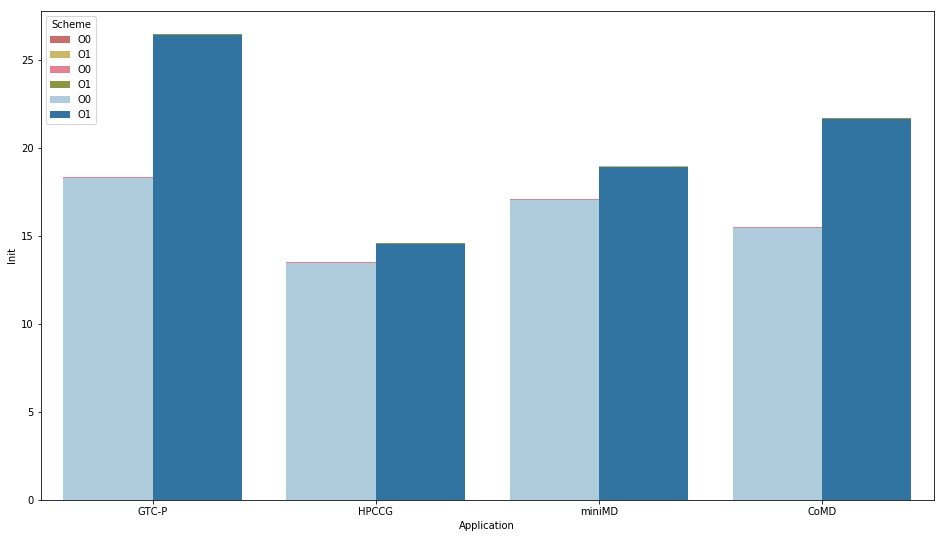

In [146]:
f, ax = plt.subplots(figsize=(16, 9))
sns.barplot(x='Application', y = 'exec', hue='Scheme', data = data, palette=sns.color_palette("hls", 8))
sns.barplot(x='Application', y = 'diag', hue='Scheme', data = data, palette=sns.color_palette("husl", 4))
sns.barplot(x='Application', y = 'Init', hue='Scheme', data = data, palette=sns.color_palette('Paired', 8))
